In [19]:
pip install -U kaleido


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
import json
import plotly.graph_objs as go
import numpy as np
import os
import plotly.io as pio
import regex as re

def read_json(file_path):
        with open(file_path, 'r') as file:
            return json.load(file)
    
def get_params_string(params):
    summary = params.get('summary', {})
    ranking = params.get('ranking', {})
    entity = params.get('entity', {})
    relation = params.get('relation', {})

    preprocess_str = f"Preprocess: {params.get('preprocess', None)}" if params.get('preprocess', None) is not None else ''
    summary_method = f"Summary Method: {summary.get('summary_method', None)}" if summary.get('summary_method', None) is not None else ''
    summary_percentage = f"Summary Percentage: {summary.get('summary_percentage', None)}" if summary.get('summary_percentage', None) is not None else ''
    ranking_method = f"Ranking Method: {ranking.get('ranking', None)}" if ranking.get('ranking', None) is not None else ''
    ranking_perc_threshold = f"Ranking Perc Threshold: {ranking.get('ranking_perc_threshold', None)}" if ranking.get('ranking_perc_threshold', None) is not None else ''
    options_ent = f"Options Ent: {', '.join(sorted(entity.get('options_ent', [None])))}" if sorted(entity.get('options_ent', [None])) != [None] else ''
    options_rel = f"Options Rel: {', '.join(sorted(relation.get('options_rel', [None])))}" if sorted(relation.get('options_rel', [None])) != [None] else ''
    local_rm = f"Local RM: {relation.get('local_rm', None)}" if relation.get('local_rm', None) is not None else ''
    rebel_model = f"Rebel Model: {relation.get('rebel_model', None)}" if relation.get('rebel_model', None) is not None else ''
    
    params_list = [preprocess_str, summary_method, summary_percentage, ranking_method, ranking_perc_threshold, options_ent, options_rel, local_rm, rebel_model]
    params_str = '\n'.join(filter(None, params_list))

    return params_str

def plot_metrics_bar(json_file, params_str):
    current_dir = os.getcwd()
    relative_path = './experiments_emnlp/pipeline/plot/metrics_folder/'
    fig_dir = os.path.join(current_dir, relative_path)
    if not os.path.exists(fig_dir):
        os.makedirs(fig_dir)
    with open(json_file) as f:
        data = json.load(f)

    folders = list(data.keys())

    # Initialize separate metrics dictionaries for 'meteor' and 'rouge-2'
    meteor_metrics = {'precision': [], 'recall': [], 'f1': []}
    rouge_metrics = {'precision': [], 'recall': [], 'f1': []}

    for folder, values in data.items():
        for metric, scores in values.items():
            for score_type, score_value in scores.items():
                if metric == 'meteor':
                    meteor_metrics[score_type].append(score_value)
                elif metric == 'rouge-2':
                    rouge_metrics[score_type].append(score_value)

    barWidth = 0.2
    r = np.arange(len(folders))

    # Create separate figures for 'meteor' and 'rouge-2'
    fig_meteor = go.Figure()
    fig_rouge = go.Figure()

    labels = ['Precision', 'Recall', 'F1']

    for metric, metrics_data, fig in [('meteor', meteor_metrics, fig_meteor), ('rouge-2', rouge_metrics, fig_rouge)]:
        for j, score_type in enumerate(['precision', 'recall', 'f1']):
            if metric == 'meteor':
                # Set fixed colors for meteor metrics
                if score_type == 'precision':
                    marker_color = 'rgb(31, 119, 180)'  # Blue
                elif score_type == 'recall':
                    marker_color = 'rgb(255, 127, 14)'  # Orange
                else:
                    marker_color = 'rgb(44, 160, 44)'  # Green
            else:
                # Set fixed colors for rouge-2 metrics
                if score_type == 'precision':
                    marker_color = 'rgb(31, 119, 180)'  # Blue
                elif score_type == 'recall':
                    marker_color = 'rgb(255, 127, 14)'  # Orange
                else:
                    marker_color = 'rgb(44, 160, 44)'  # Green

            fig.add_trace(go.Bar(x=r + j * barWidth, 
                                 y=metrics_data[score_type], 
                                 name=f'{metric.capitalize()} {labels[j]}', 
                                 marker_colorscale='viridis',
                                 marker_color=marker_color))  

            fig.update_layout(
                barmode='group',
                xaxis_tickangle=-45,
                xaxis=dict(tickvals=r + barWidth * 1.5, ticktext=folders, title='Folders'),
                yaxis=dict(title='Scores'),
                legend=dict(x=1, y=1),
                margin=dict(l=50, r=50, t=80, b=80),
                width=800,
                height=600,
                title={
                    'text': f'Parmaters:\n{params_str}',
                    'font': {'size': 14, 'family': 'Arial', 'color': 'black'},
                    'x': 0.5,  # Set the title's horizontal position to the center
                    'y': 0.95,  # Set the title's vertical position closer to the top
                },
                plot_bgcolor='rgba(0,0,0,0)'  # Set transparent background
            )
    # print("Parameters String:", params_str)
    params_str_clean = re.sub(r'[^\w\s-]', '', params_str)
    params_str_clean = params_str_clean.replace(' ', '_')[:100]  # Limit length to 100 characters
    
    
    pio.write_image(fig, os.path.join(fig_dir, f"{params_str_clean}_time_plot.png"))
    fig_meteor.show()
    fig_rouge.show()

def plot_metrics_bar_for_folder(folder_path):
    subfolders = [f.path for f in os.scandir(folder_path) if f.is_dir()]
    
    for subfolder in subfolders:
        params_path = os.path.join(subfolder, 'params.json')
        json_file = os.path.join(subfolder, 'metrics.json')
        if os.path.exists(json_file):
            params = read_json(file_path=params_path)
                    
            params_str = get_params_string(params=params)
            plot_metrics_bar(json_file,params_str)

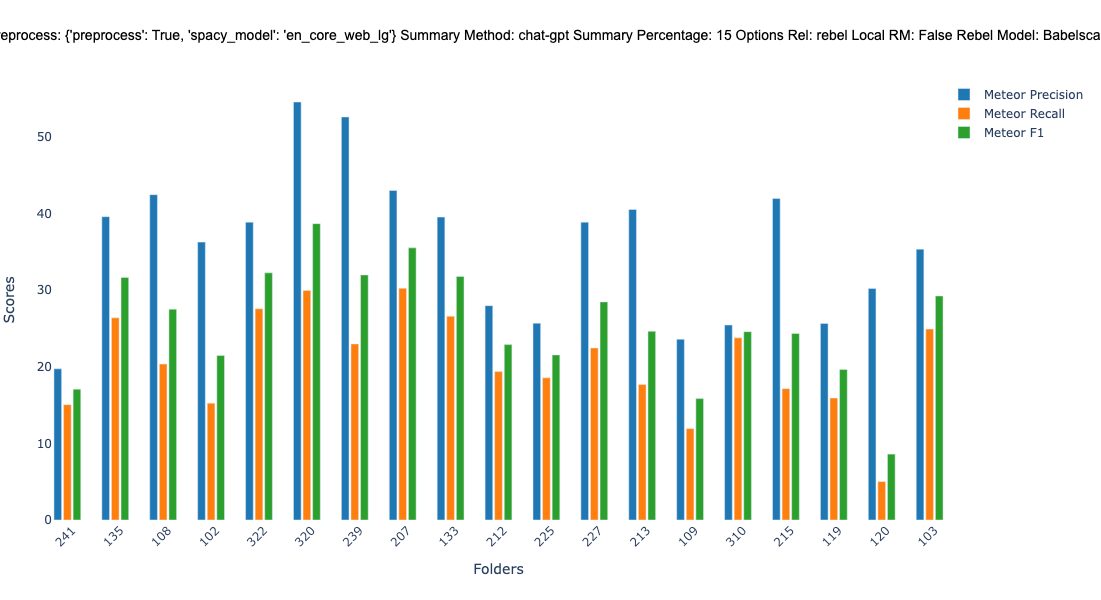

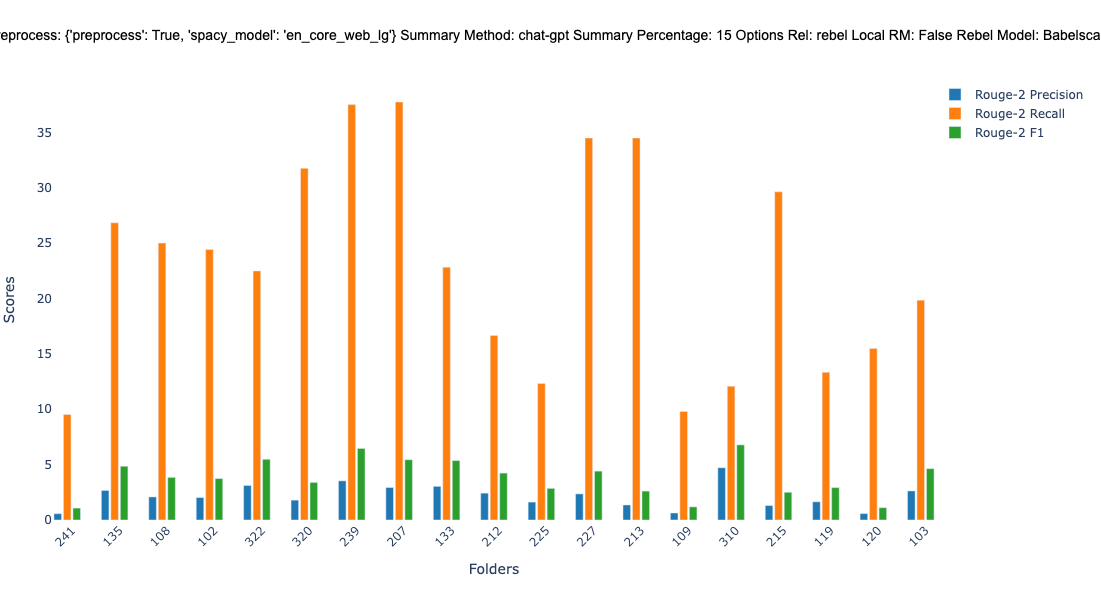

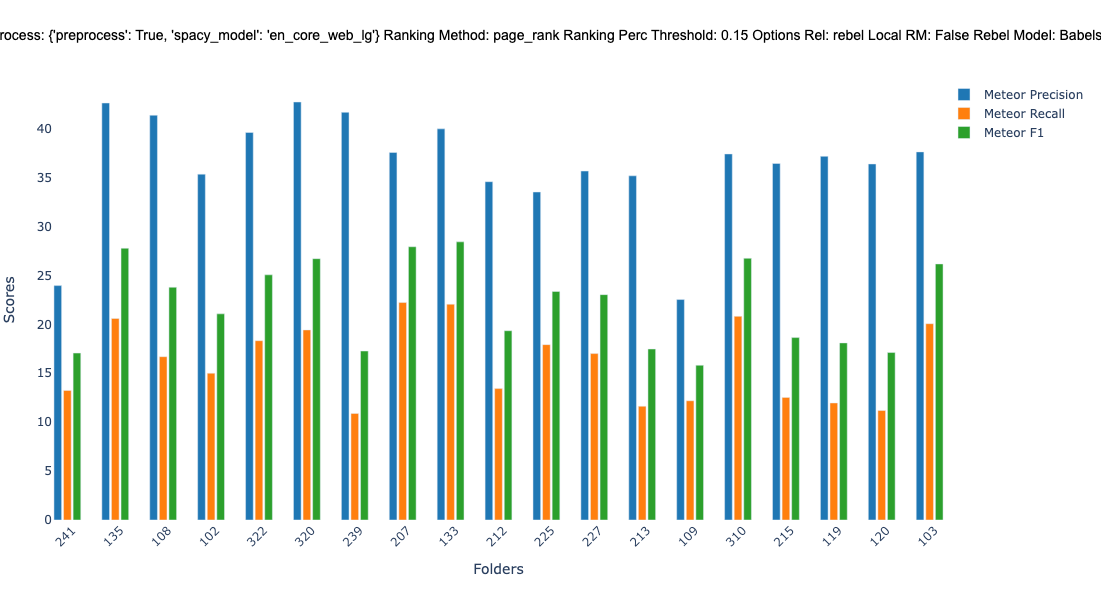

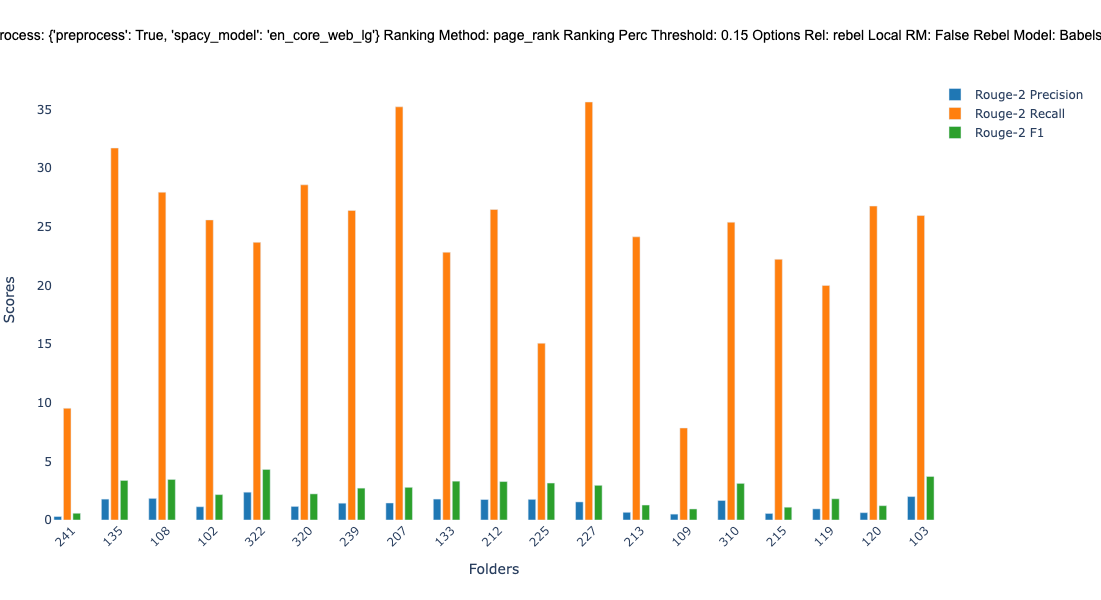

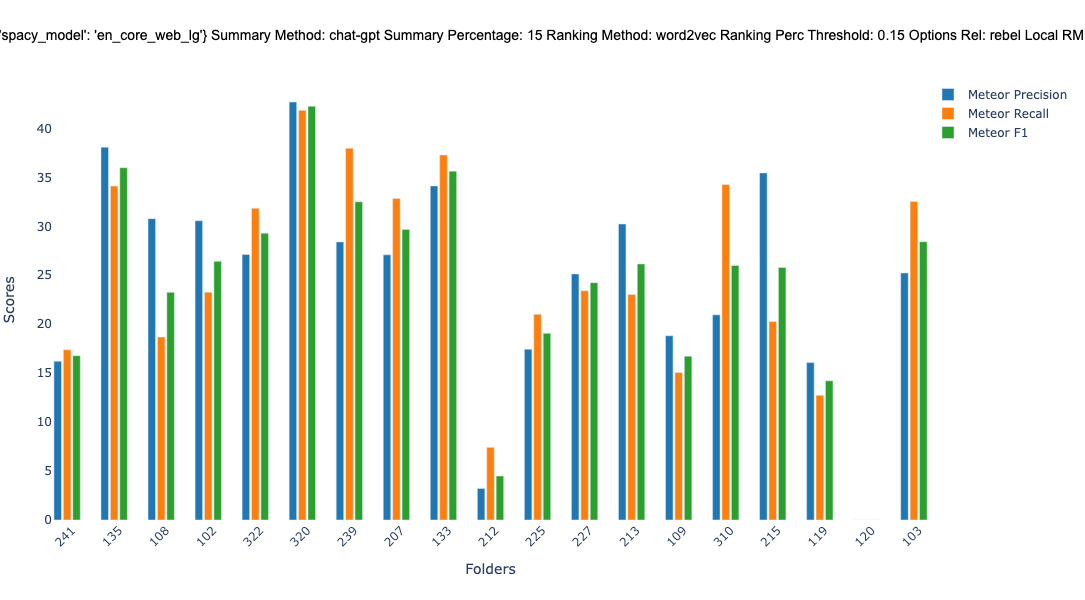

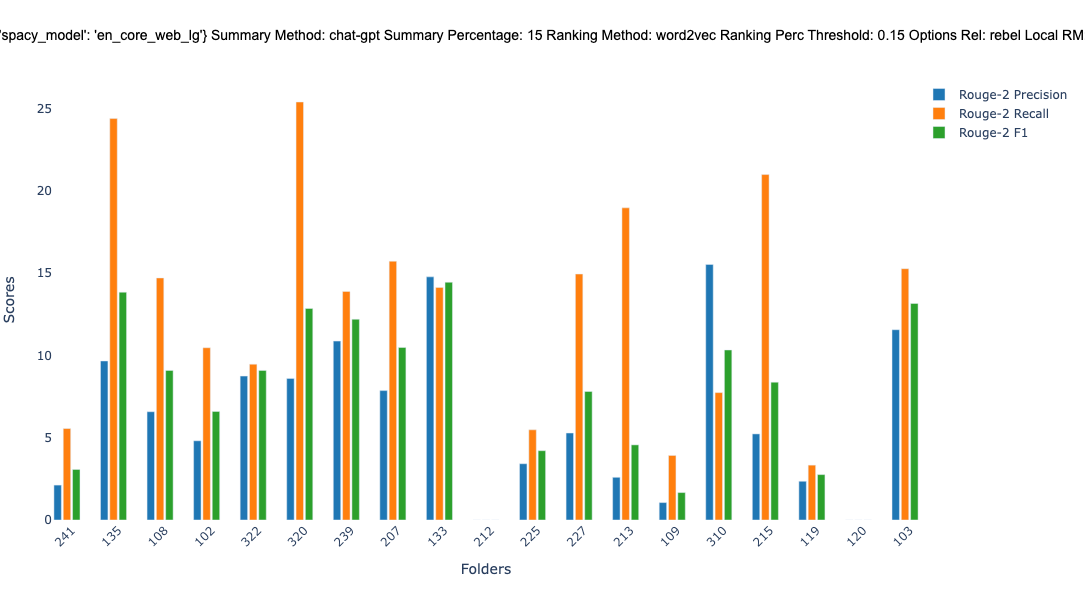

In [26]:
# Example usage:
folder_path = './experiments_emnlp/pipeline/final_exps/wiki_test/'
plot_metrics_bar_for_folder(folder_path)

In [9]:
!pwd